# Regressione Lineare Multipla

In questo notebook vedremo la **regressione lineare multipla**. 

La regressione lineare multipla funziona esattamente come quella semplice; l'unica differenza sta nel fatto che stavolta utilizziamo più features (identificate come **variabili significative**, ovvero che influenzano la variabile target) come predittori del nostro modello.

Il modello predittivo rimane **lineare** in quanto i pesi (non i regressori !) compaiono sempre alla prima potenza e non vi vengono applicati operatori non lineari (ad es il seno o il coseno).

Utilizzeremo il **Boston Housing Dataset**. Il Boston Housing Dataset contiene 506 esempi di abitazioni nella zona di Boston con le seguenti 14 features:

* **CRIM** Tasso di criminalità per capita
* **ZN** Percentuale di terreni residenziali suddivisi in zone per lotti superiori a 25.000 sq.ft.
* **INDUS** Percentuale di ettari di attività non al dettaglio per città.
* **CHAS** Variabile dummy che indica la prossimità al fiume Charles.
* **NOX** Concentrazione di ossido d'azoto (parti per 10 milioni).
* **RM** Numero medio di stanze per abitazione
* **AGE** Percentuale di abitazione occupate costruite dopo il 1940
* **DIS** Media pesata delle distanze da 5 centri lavorativi di Boston.
* **RAD** Indice di accessibilità ad autostrade
* **TAX** Aliquota dell'imposta sulla proprietà a valore pieno in 10.000 USD.
* **PRATIO** Rapporto studente-insegnante per città.
* **BLACK** 1000(Bk - 0.63)^2 dove Bk è la percentuale di abitanti di colore per città
* **LSTAT** Percentuale della popolazione povera
* **MEDV** Mediana del valore di abitazioni occupate in 1.000 USD.

Il nostro obiettivo è predirre il **MEDV** utilizzando 2 o più features.
Cominciamo importando le librerie necessarie:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Carichiamo il dataset dalla repository in un DataFrame

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Selezione dei predittori

Cominciamo esplorando il DataFrame alla ricerca di correlazioni tra le varie features e tra le features e il target MEDV.
In questi casi è molto utile il metodo *corr* del DataFrame, che ritorna un indice della correlazione tra le varie colonne. L'indice è un valore in un range tra -1 e 1 che assume questi significati:

* **Valore tendente allo 0**: La correlazione tra le features è nulla o scarsa.
* **Valore tendente ad 1**: Le features sono direttamente correlate (l'aumento della prima comporta l'aumento della seconda).
* **Valore tendente ad -1**: Le features sono inversamente correlate (l'aumento della prima comporta il decremento della seconda).

In [3]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Esiste un modo migliore per visualizzare le correlazioni ? Certo, una **heatmap**.

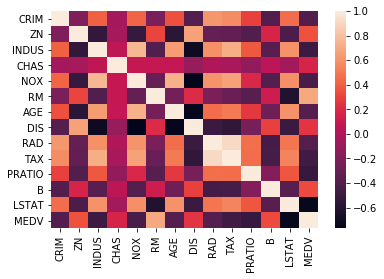

In [4]:
sns.heatmap(dataset.corr())

La barra verticale sulla destra indica lo spettro della correlazione:

* Tendente al rosso vuol dire **nessuna o scarsa correlazione** (valore 0)
* Tendente al nero vuol dire **correlazione inversa** (valore -1)
* Tendente al bianco vuol dire **correlazione diretta** (valore 1)

Ovviamente la diagonale tende al bianco perchè rappresenta la correlazione tra una feature e se stessa.

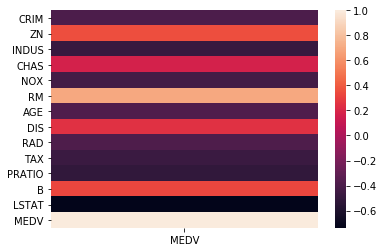

In [5]:
sns.heatmap(dataset.corr().iloc[:,-1:])

Le features più direttamente correlate con MEDV sembrerebbero essere **RM** e **ZN**, mentre quelle più inversamente correlate **LSTAT**, **PRATIO**, **TAX** e **INDUS**.

Creiamo un'altra heatmap più piccola contenente solo queste features e questa volta stampiamo anche il valore numerico della correlazione.

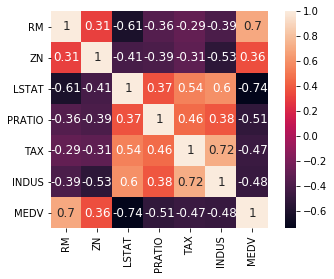

In [6]:
subset=['RM',"ZN","LSTAT","PRATIO","TAX","INDUS","MEDV"]

hm = sns.heatmap(dataset[subset].corr(),
                 cbar=True,
                 square=True,
                 yticklabels=dataset[subset].columns,
                 xticklabels=dataset[subset].columns,
                 annot=True,                          #Questo ci mostra i valori degli indici
                 annot_kws={'size':12})               #Impostiamo la dimensione dell'annotazione a 12 per farla entrare dentro il quadrato

plt.show()

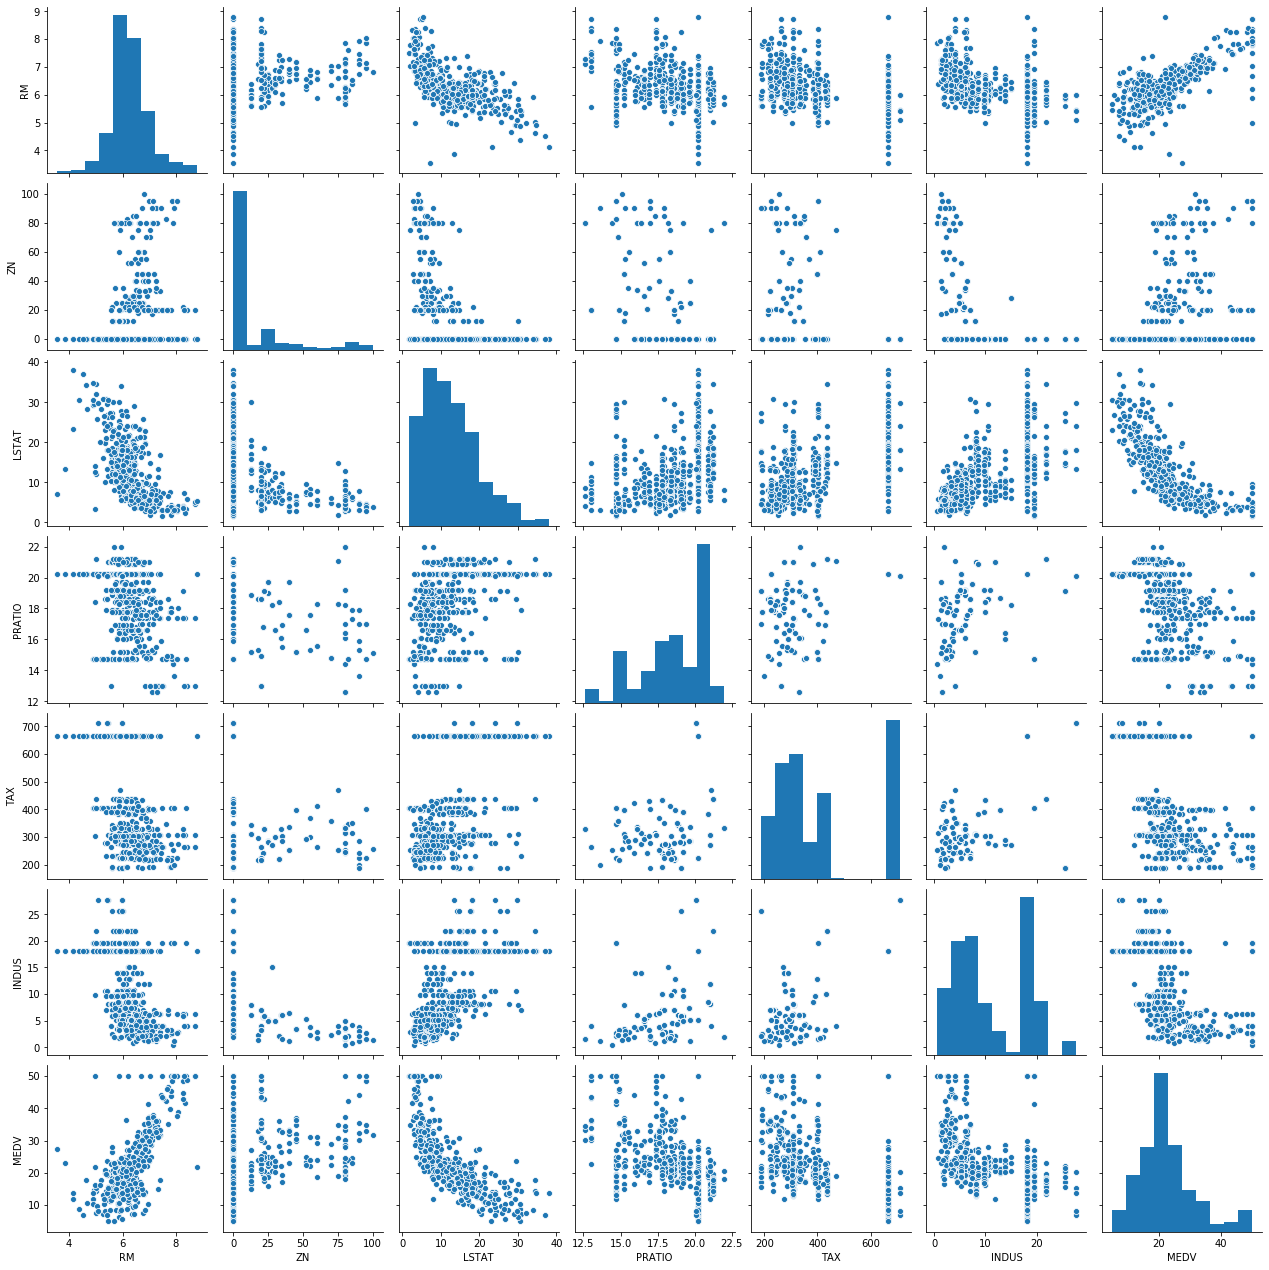

In [7]:
sns.pairplot(dataset[subset])

### Preprocessing

#### Check sui null values

In [8]:
dataset[subset].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   ZN      506 non-null    float64
 2   LSTAT   506 non-null    float64
 3   PRATIO  506 non-null    float64
 4   TAX     506 non-null    float64
 5   INDUS   506 non-null    float64
 6   MEDV    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


Non ci sono valori nulli nel subset di nostro interesse.

### Regressione lineare multipla

Eseguiamo una regressione lineare multipla su tutte le features.

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.drop("MEDV", axis=1)
Y = dataset["MEDV"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  test_size=0.3, random_state=0)

#### Scaling

Porto tutte le features su una stessa scala di valori.

In [10]:
X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

Procedo con la regressione lineare.

In [11]:
ll = LinearRegression()
ll.fit(X_train_std, Y_train)
Y_pred = ll.predict(X_test_std)

print("MSE: "+str(mean_squared_error(Y_test, Y_pred)))
print("R2 score: "+str(r2_score(Y_test, Y_pred)))

MSE: 28.37561711510865
R2 score: 0.6592152025195629


Errore e punteggio ottenuti sono decisamente migliori rispetto al caso della regressione lineare semplice (dove MSE:38.98 e R2 score:0.53).

Vediamo quali proprietà hanno più peso nella regressione osservandone i coefficenti.

In [12]:
weights = pd.DataFrame(data=list(zip(dataset.columns, ll.coef_)), columns=['feature', 'weight'])
weights.sort_values(by = 'weight')

,feature,weight
12,LSTAT,-3.445368
7,DIS,-3.102049
10,PRATIO,-2.264305
9,TAX,-1.888733
4,NOX,-1.876343
0,CRIM,-1.013333
6,AGE,-0.279968
2,INDUS,0.079322
11,B,0.583468
3,CHAS,0.619838


I pesi sono tanto maggiori in valore assoluto quanto maggiore è l' incidenza della relativa feature sulla variabile target MEDV.